# **Setting for Using Mesh R-CNN Demo**

In [27]:
import os
from sklearn.model_selection import train_test_split
# from IPython.display import Image

import torchvision
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

from bs4 import BeautifulSoup

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from PIL import Image

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [3]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
%env FORCE_CUDA=1
!pip install -U torch==1.6 torchvision==0.7 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
!pip install -U fvcore==0.1.3.post20210317
!pip install -U --force-reinstall iopath==0.1.6 
!pip install 'git+https://github.com/facebookresearch/detectron2.git@4b539e41f4b19570bc6b722fa0f516f927cdae02'
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git'

env: FORCE_CUDA=1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.1/708.1 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.6.0+cu101 which is incompatible.
torchaudio 0.13.

In [4]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available(),torch.cuda.device_count())
!gcc --version
!python --version
!nvcc --version
!nvidia-smi
!python -m detectron2.utils.collect_env

1.6.0+cu101 False 0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.8.10
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

/usr/bin/python3: Error while finding module specification for 'detectron2.utils.collect_env' (ModuleNotFoundError: No module named 'detectron2')


In [5]:
!git clone https://github.com/facebookresearch/meshrcnn.git
!cd meshrcnn && pip install -e .

Cloning into 'meshrcnn'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 256 (delta 16), reused 38 (delta 13), pack-reused 210
Receiving objects: 100% (256/256), 137.99 KiB | 4.93 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/meshrcnn
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement detectron2 (from meshrcnn) (from versions: none)
ERROR: No matching distribution found for detectron2


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!cd /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN
!chmod 755 meshrcnn/datasets/pix3d/download_pix3d.sh

In [8]:
# pix3d data download
#!./meshrcnn/datasets/pix3d/download_pix3d.sh

# **Visualization Custom Data**

In [9]:
img_path = '/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/'
train_ims = list(sorted(os.listdir(img_path)))

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


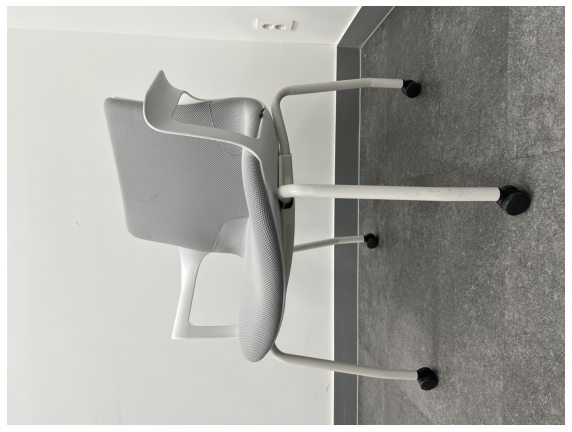

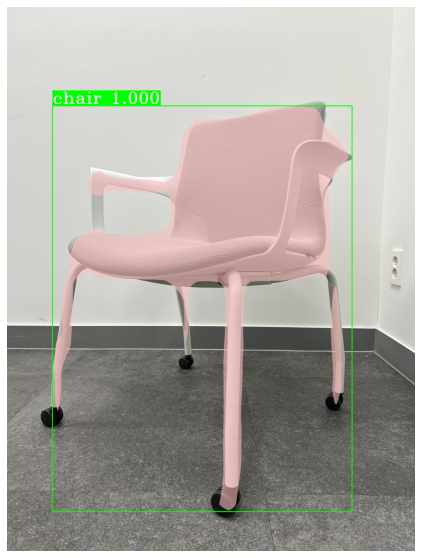

In [28]:
#only revise IMG_0X & train_ims[X+1]
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_01.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[0] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_1.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

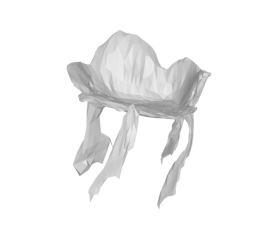

In [11]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_1.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


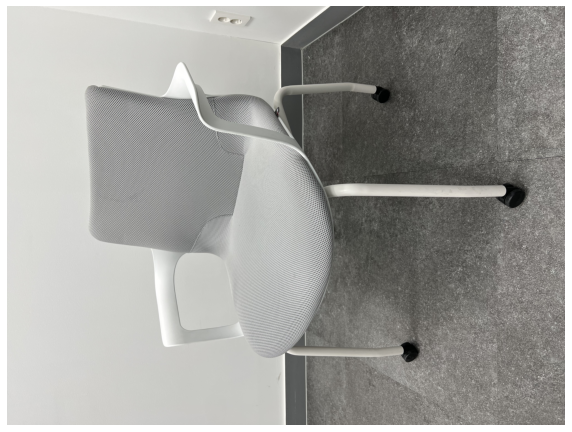

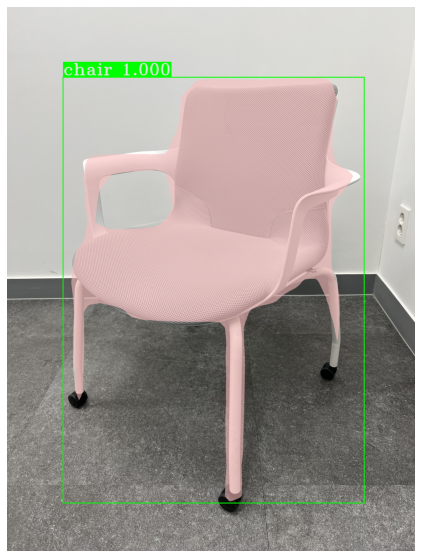

In [12]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_02.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[1] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_2.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

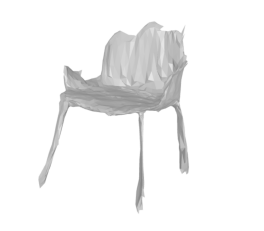

In [13]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_2.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


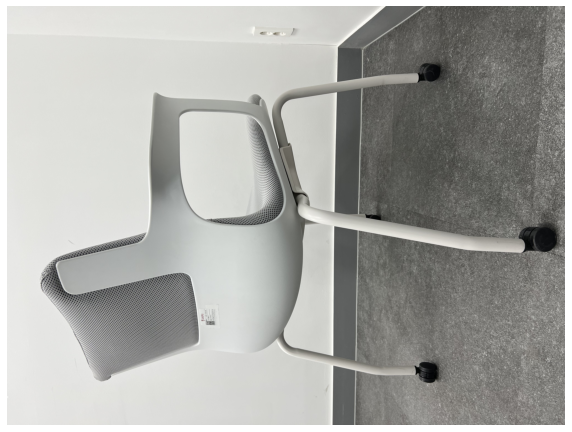

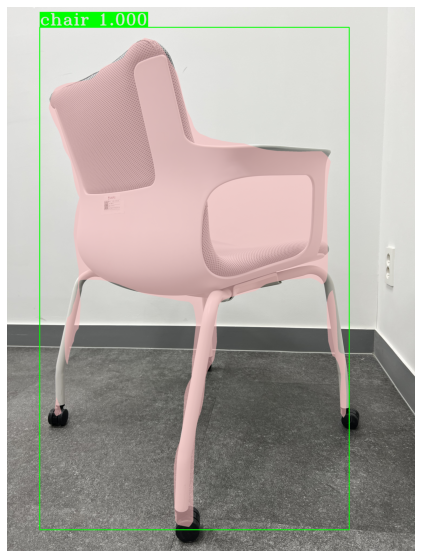

In [15]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_03.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[2] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_3.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

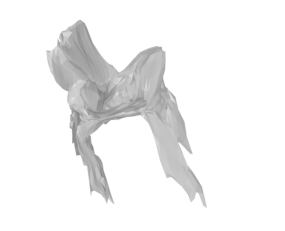

In [16]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_3.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


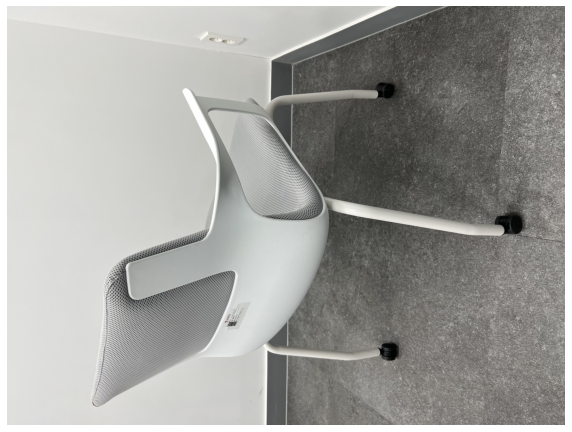

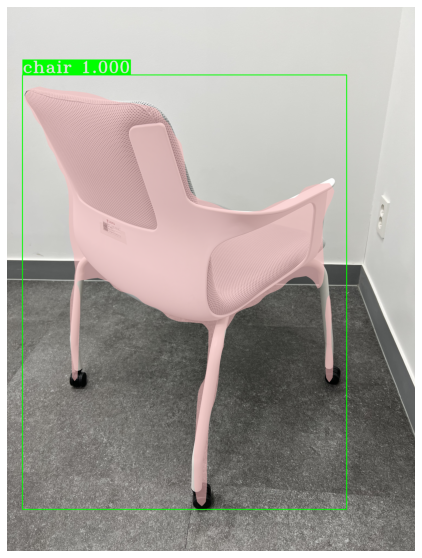

In [17]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_04.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[3] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_4.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

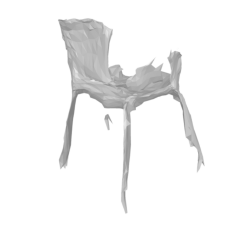

In [18]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_4.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


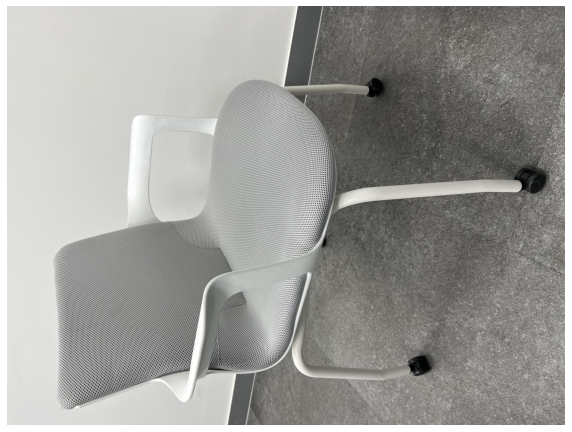

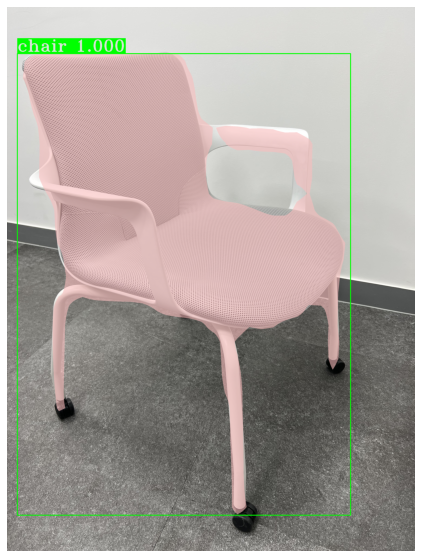

In [19]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_05.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[4] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_5.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

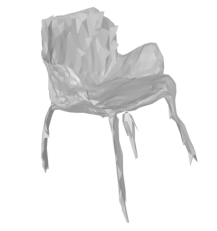

In [20]:
#after running, capture the obj file
filename = train_ims[4]
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_5.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


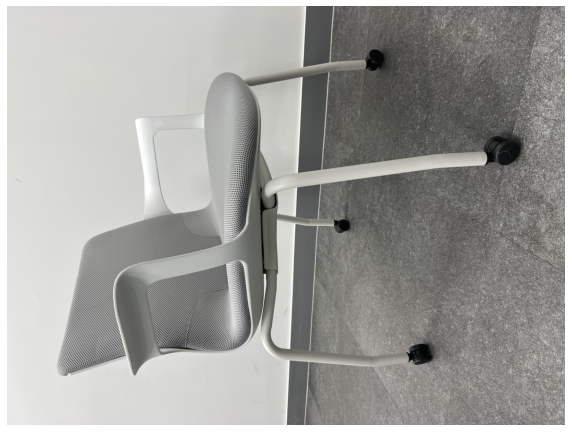

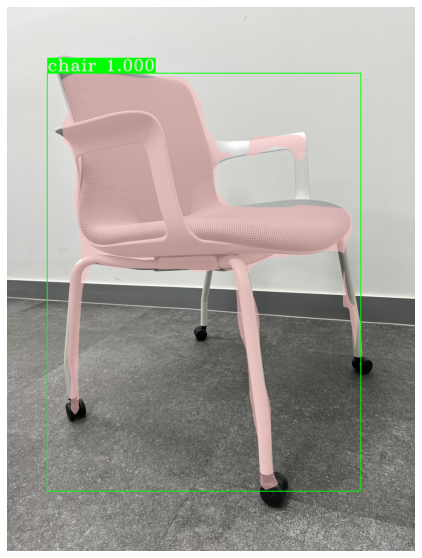

In [21]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_06.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[5] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_6.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

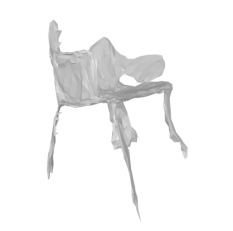

In [22]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_6.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


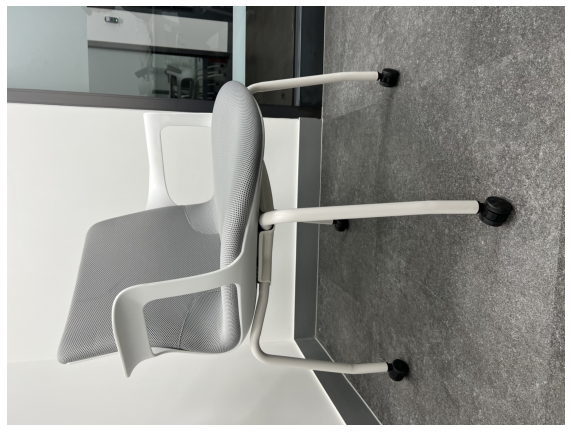

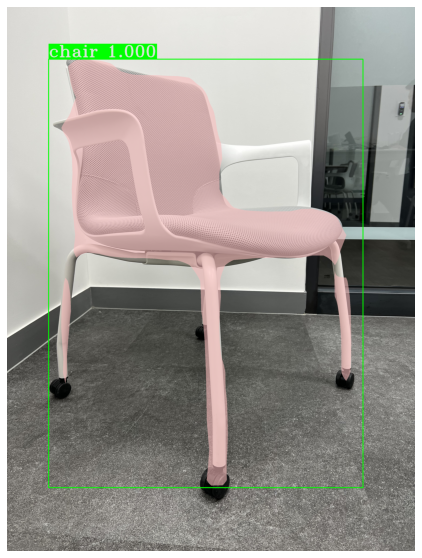

In [23]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_07.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[6] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_7.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

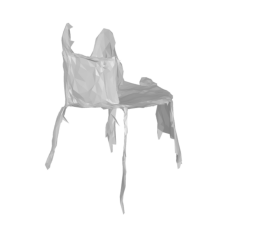

In [24]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_7.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()

Traceback (most recent call last):
  File "./meshrcnn/demo/demo.py", line 10, in <module>
    from detectron2.config import get_cfg
ModuleNotFoundError: No module named 'detectron2'


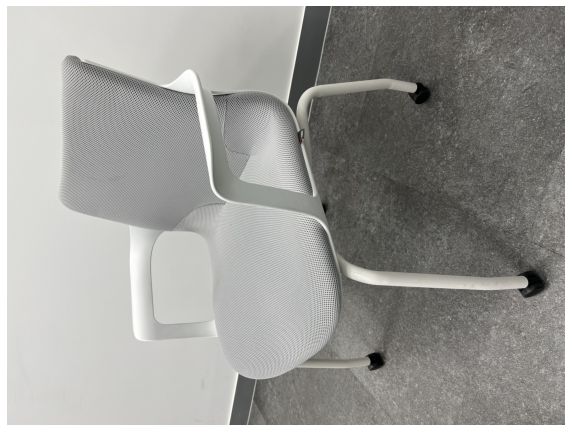

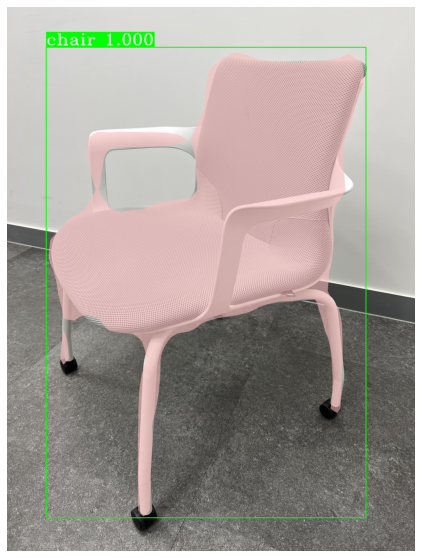

In [25]:
!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/IMG_08.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

filename = train_ims[7] #check the name is the same as the file you uploaded
maskname = '0_mask_chair_8.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/imgs/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

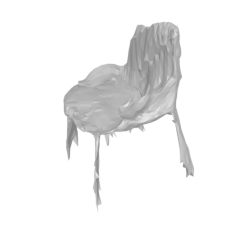

In [26]:
#after running, capture the obj file
Mesh_img = plt.imread("/content/drive/MyDrive/Colab_Notebooks/github/AIKU_deepintodeep/assignment5/MeshRCNN/output_demo/"+ filename[:6] +'/'+ 'chair_mesh_8.png')
plt.imshow(Mesh_img)
plt.axis('off')
plt.show()